In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json
import seaborn as sns

In [2]:
# import data
df_all = pd.read_csv('data/all.csv').drop(['Unnamed: 0'], axis=1)
df_part = pd.concat([df_all.iloc[:, :23], df_all.iloc[:, 71:]], axis=1)

In [3]:
df_all.head(3)

,stu_id,visa_typ_cd,usr_visa_strt_tm,usr_visa_end_tm,group,min_time,par_days,actual_day,sub_tol,sub_avg,sub_avg_a,ex_tol,ex_subrate,sub_ins_sd,sub_ins_m,ins_m,auc_sub_avg,auc_sub_sd,ins_max,ins_summit_four_1,ins_summit_four_2,ins_summit_four_3,ins_summit_max,0point_sub,1point_sub,2point_sub,3point_sub,4point_sub,5point_sub,6point_sub,7point_sub,8point_sub,9point_sub,10point_sub,11point_sub,12point_sub,13point_sub,14point_sub,15point_sub,16point_sub,17point_sub,18point_sub,19point_sub,20point_sub,21point_sub,22point_sub,23point_sub,0point_ex,1point_ex,2point_ex,3point_ex,4point_ex,5point_ex,6point_ex,7point_ex,8point_ex,9point_ex,10point_ex,11point_ex,12point_ex,13point_ex,14point_ex,15point_ex,16point_ex,17point_ex,18point_ex,19point_ex,20point_ex,21point_ex,22point_ex,23point_ex,notscWe_sub,notscWe_ex,notscWd_sub,notscWd_ex,sc_sub,sc_ex,pub_avg,pub_sd,n_ex,n_pkg,n_pra_ex_avg,n_pra_ex_sd,y,top_schl_id,school,delta_days,year,delta_lable,province,level
0,64005,A,2016-06-19 00:00:00,2016-12-19 23:59:59,1625.0,2016-06-19 09:18:16,91.999994,16,89,0.967391,5.562500,509,0.647926,269.284575,179.550562,2.033708,97.156679,8.085544,43,25.00,102.0,201.00,1562,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,5,62,18,2,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,19,366,97,15,0,44.0,248.0,3.0,13.0,42.0,248.0,4.122255,2.054635,391,25,1.30179,0.604235,1.0,432590.0,down,183,2016,6m,北京市,1st
1,64005,A1,2016-12-24 00:00:00,2017-06-24 23:59:59,1626.0,2016-12-24 20:21:05,91.499994,18,180,1.967213,10.000000,1032,0.538399,145.235432,128.694444,1.000000,98.138889,9.697912,25,67.75,101.0,156.25,1427,0,0,0,0,0,0,0,0,4,0,0,0,0,0,10,3,0,0,0,73,63,27,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,60,9,0,0,0,424,356,163,0,0,18.0,95.0,120.0,693.0,42.0,244.0,2.796135,1.737008,501,28,2.05988,0.977961,1.0,436223.0,down,182,2017,6m,临汾市,4th
2,64005,A1,2017-07-01 00:00:00,2017-12-03 22:06:52,2092.0,2017-07-01 21:03:18,77.960718,11,138,1.770122,12.545455,868,0.642373,51.065638,80.702899,0.920290,99.359903,3.725814,32,56.00,72.5,102.50,387,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,8,4,87,20,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,54,24,570,102,48,0,38.0,255.0,48.0,287.0,52.0,326.0,2.766655,1.802080,602,32,1.44186,0.776597,1.0,434410.0,down,155,2017,6m,北京市,1st


In [4]:
df_focus = df_all[['par_days','n_ex','level','visa_typ_cd']]

In [5]:
# 将类别变量编码
from sklearn import preprocessing
visaType_encoder = preprocessing.LabelEncoder()
visaType_classes = df_focus.visa_typ_cd.values
visaType_encoder.fit(visaType_classes)
visaType_raw = df_focus.visa_typ_cd.values
visaType_new = visaType_encoder.transform(visaType_raw)

cityLevel_encoder = preprocessing.LabelEncoder()
cityLevel_classes = df_focus.level.values
cityLevel_encoder.fit(cityLevel_classes)
cityLevel_raw = df_focus.level.values
cityLevel_new = cityLevel_encoder.transform(cityLevel_raw)


print ("\nvisaType Class mapping:")
for i, item in enumerate(visaType_encoder.classes_):
    print (item,'-->', i)
    
print ("\ncityLevel Class mapping:")
for i, item in enumerate(cityLevel_encoder.classes_):
    print (item,'-->', i)



visaType Class mapping:
('A', '-->', 0)
('A1', '-->', 1)
('A2', '-->', 2)
('A3', '-->', 3)
('B', '-->', 4)
('C', '-->', 5)
('D1', '-->', 6)
('D2', '-->', 7)
('D3', '-->', 8)

cityLevel Class mapping:
('1st', '-->', 0)
('2nd', '-->', 1)
('3rd', '-->', 2)
('4th', '-->', 3)
('new1', '-->', 4)


In [6]:
df_focus.head(2)

,par_days,n_ex,level,visa_typ_cd
0,91.999994,391,1st,A
1,91.499994,501,4th,A1


In [7]:
df_focus = pd.concat([df_focus,
           pd.get_dummies(df_focus.visa_typ_cd),
           pd.get_dummies(df_focus.level)],
           axis=1).drop(['level','visa_typ_cd'], axis=1)

In [11]:
df_focus.head(2)

,par_days,n_ex,A,A1,A2,A3,B,C,D1,D2,D3,1st,2nd,3rd,4th,new1
0,91.999994,391,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,91.499994,501,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
X = df_focus.values
y = df_all.y.values

In [33]:
# decision tree:c art
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import graphviz 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

def cart(X, y):
    # one-hot encoding
    #enc = OneHotEncoder()
    #enc.fit(X)
    #X_new = enc.transform(X).toarray()
    
    # decision tree: cart(gini)
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=100)
    clf = clf.fit(X, y)
    
    # k-fold cross-validation
    scores = cross_val_score(clf, X, y, scoring='f1', cv=10)
    cnf_matrix = confusion_matrix(y, clf.predict(X))

    print 'F1-score is: %s' % scores
    print 'confusion matrix is: %s' % cnf_matrix
    
    # save the tree img
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render("img/tree2")
    
    return (clf,dot_data)

In [34]:
clf,dot_data = cart(X,y)

F1-score is: [0.8529 0.9355 0.6972 0.9144 0.9374 0.9374 0.9374 0.9374 0.9374 0.9374]
confusion matrix is: [[   550  50094]
 [   242 379085]]


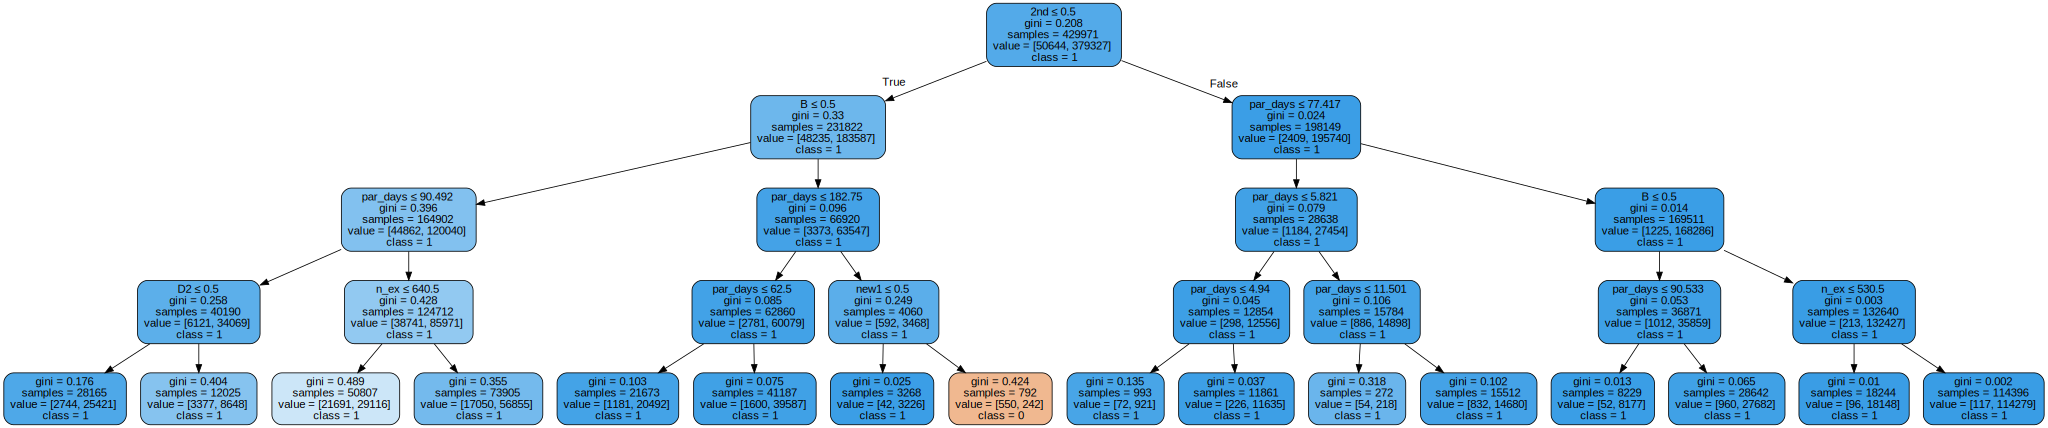

In [35]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=df_focus.columns.values,
                                class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 